# 基金组合优化

In [ ]:
import akshare as ak
import pandas as pd
# 获取资产池的历史价格
price_df = pd.DataFrame()
#实际列表
sw_index_list = ['161907','040046','007380','015016','013308','016630','162411','160416','000369','005613','007721','008763','001668','006282','000043','164701','164824','519191','000893']
# 剔除20年后成立的
# sw_index_list = ['040046','007380','162411','160416','000369','005613','007721','008763','001668','006282','000043','164701','164824','519191','000893']

# 逐个获取指数行情数据
i = 0
for code in sw_index_list:
    bars = ak.fund_open_fund_info_em(symbol=code, indicator="累计净值走势")
    bars['净值日期'] = pd.to_datetime(bars['净值日期']).dt.strftime('%Y-%m-%d')
    bars.index = pd.to_datetime(bars['净值日期'])
    price_df[code] = bars['累计净值']
    i += 1
    print("\r已获取[{}/{}]支基金的数据".format(i, len(sw_index_list)), end="")  # 输出处理进度
price_df.columns =sw_index_list

已获取[19/19]支基金的数据

In [ ]:
# 选取指定日期范围的数据
start_date = '2014-03-28'
end_date = '2024-03-28'
price_df = price_df[(price_df.index >= start_date) & (price_df.index <= end_date)]

# price_df

## 走势图

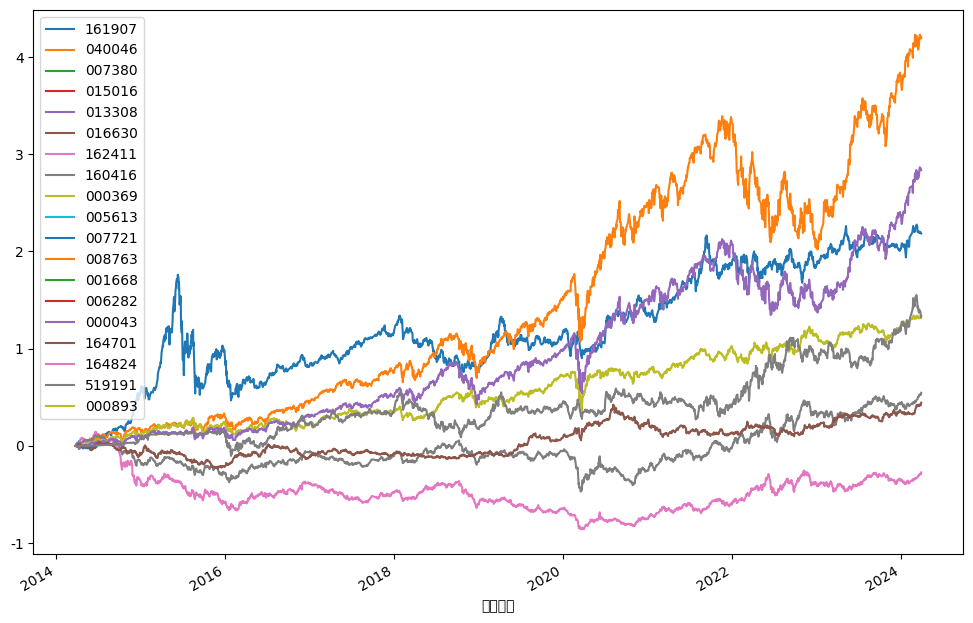

In [ ]:
# 在matplotlib绘图中显示中文和负号
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['axes.unicode_minus'] = False   # 解决坐标轴负数的负号显示问题
fig = plt.figure(figsize=(12, 8)) 
ax = fig.add_subplot(111)
(price_df.div(price_df.iloc[0])-1).plot(ax=ax)
plt.show()

In [ ]:
import riskfolio as rp
#计算资产收益率Y：
Y = price_df.pct_change().dropna()
# 构建投资组合对象
port = rp.Portfolio(returns=Y)
# 选择估算方法
method_mu='hist' # 基于历史数据估算预期收益的方法
method_cov='hist' # 基于历史数据估算协方差矩阵的方法
# Choose the risk measure
rm = 'MV'  # Standard Deviation

# 使用选择的方法估算参数
port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)
# 估算最优投资组合权重
hist = True # 是否使用历史场景来计算依赖于场景的风险度量
model='Classic' # 模型可以是 Classic（经典）、BL（Black Litterman）或 FM（Factor Model）
obj = 'Sharpe' # 优化的目标，可以是 MinRisk, MaxRet, Utility 或 Sharpe
rf = 0 # 无风险利率
l = 0 # 风险厌恶因子，仅在目标函数为 'Utility' 时有用
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

## 粗算组合

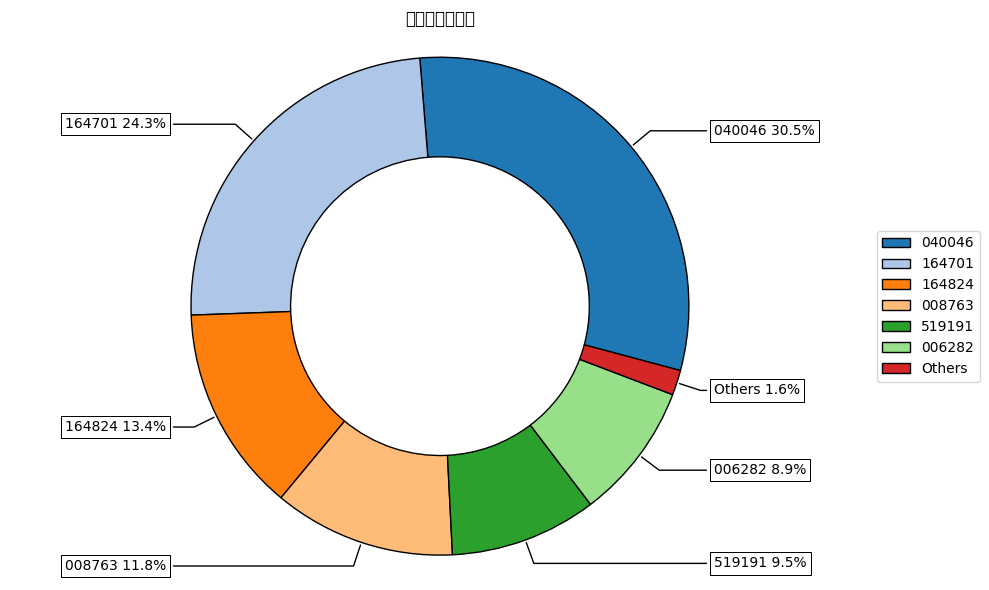

In [ ]:
# 选择模型和目标函数
model='Classic' # 模型可以是 Classic（经典）、BL（Black Litterman）或 FM（Factor Model）
rm = 'MV' # 使用的风险度量，这里我们使用标准差
obj = 'Sharpe' # 优化的目标，可以是 MinRisk, MaxRet, Utility 或 Sharpe
hist = True # 是否使用历史场景来计算依赖于场景的风险度量
rf = 0 # 无风险利率
l = 0 # 风险厌恶因子，仅在目标函数为 'Utility' 时有用

# 估算最优投资组合权重
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

# 可视化资产组合权重图
ax = rp.plot_pie(w=w, title='资产组合权重图', others=0.05, nrow=25, cmap="tab20", height=6, width=10, ax=None)

## 至少5只

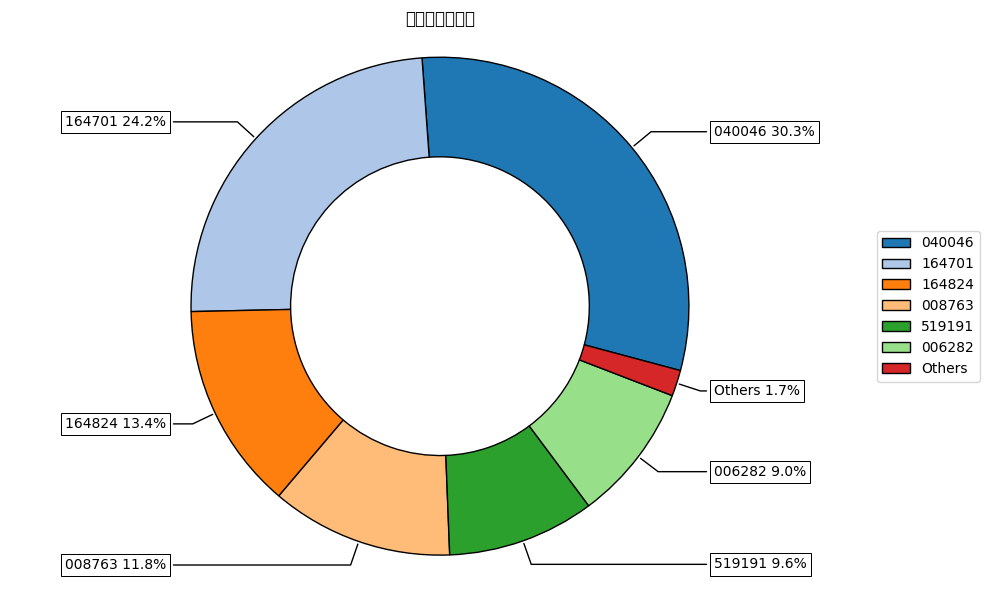

In [ ]:
port.nea = 5
# 选择模型和目标函数
model='Classic' # 模型可以是 Classic（经典）、BL（Black Litterman）或 FM（Factor Model）
rm = 'MV' # 使用的风险度量，这里我们使用标准差
obj = 'Sharpe' # 优化的目标，可以是 MinRisk, MaxRet, Utility 或 Sharpe
hist = True # 是否使用历史场景来计算依赖于场景的风险度量
rf = 0 # 无风险利率
l = 0 # 风险厌恶因子，仅在目标函数为 'Utility' 时有用

# 估算最优投资组合权重
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

# 可视化资产组合权重图
ax = rp.plot_pie(w=w, title='资产组合权重图', others=0.05, nrow=25, cmap="tab20", height=6, width=10, ax=None)

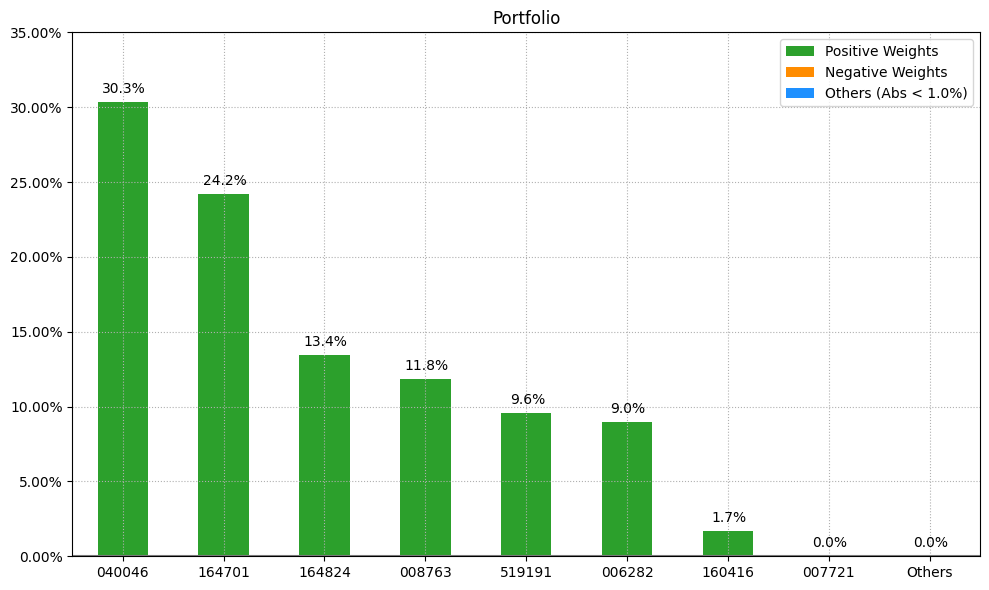

In [ ]:
ax = rp.plot_bar(w,
                 title='Portfolio',
                 kind="v",
                 others=0.05,
                 nrow=25,
                 height=6,
                 width=10,
                 ax=None)

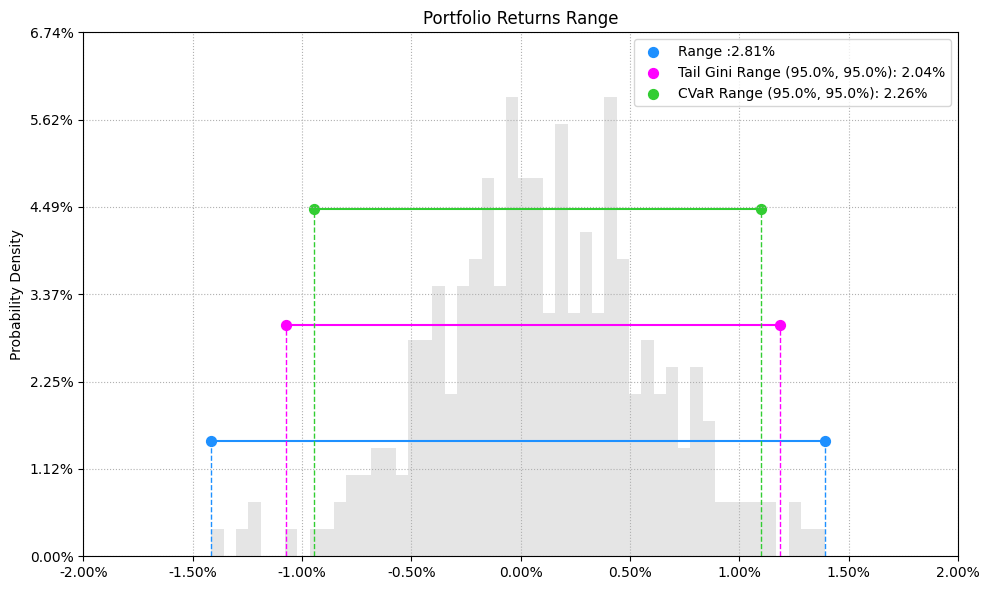

In [ ]:
ax = rp.plot_range(returns=Y,
                w=w,
                alpha=0.05,
                a_sim=100,
                beta=None,
                b_sim=None,
                bins=50,
                height=6,
                width=10,
                ax=None)

In [ ]:
ax = rp.plot_drawdown(returns=Y,
                      w=w1,
                      alpha=0.05,
                      height=8,
                      width=10,
                      ax=None)

NameError: name 'rp' is not defined

/root/venv/lib/python3.9/site-packages/riskfolio/src/PlotFunctions.py:572: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.tight_layout()
/root/venv/lib/python3.9/site-packages/riskfolio/src/PlotFunctions.py:572: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  fig.tight_layout()
/root/venv/lib/python3.9/site-packages/riskfolio/src/PlotFunctions.py:572: UserWarning: Glyph 22799 (\N{CJK UNIFIED IDEOGRAPH-590F}) missing from current font.
  fig.tight_layout()
/root/venv/lib/python3.9/site-packages/riskfolio/src/PlotFunctions.py:572: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from current font.
  fig.tight_layout()
/root/venv/lib/python3.9/site-packages/riskfolio/src/PlotFunctions.py:572: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from current font.
  fig.tight_layout()
/root/venv/lib/python3.9/site-packages/riskfolio/src/PlotFunctions.py:572: UserWarning: Glyph 2

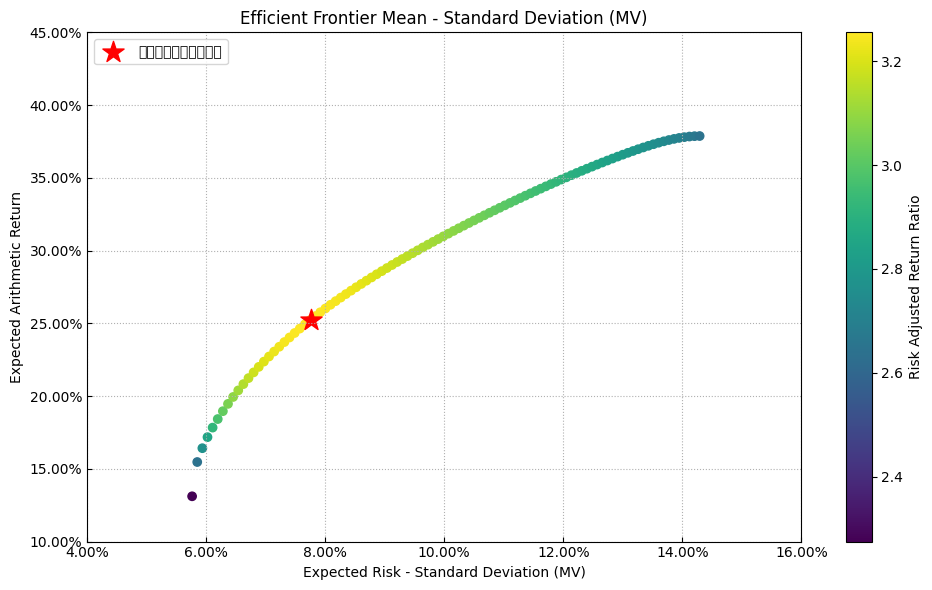

In [ ]:
# 设置有效前沿的点数
points = 100

# 计算有效前沿
frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)
# 设置标签和其他参数
label = '最大夏普比率投资组合' # 点的标题
mu = port.mu # 预期收益
cov = port.cov # 协方差矩阵
returns = port.returns # 资产收益率

# 绘制有效前沿
ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05, cmap='viridis', w=w, 
                      label=label, marker='*', s=16, c='r', height=6, width=10, ax=None)

# 基金成立时间

In [ ]:
import akshare as ak
sw_index_list = ['040046','007380','015016','013308','016630','162411','160416','000369','005613','007721','008763','001668','006282','000043','164701','164824','519191','000893']
fund_individual_basic_info_xq_df = ak.fund_individual_basic_info_xq(symbol="000001")

In [ ]:
# print(fund_individual_basic_info_xq_df)
import pandas as pd
fund_df = pd.DataFrame()
sw_index_list = ['040046','007380','015016','013308','016630','162411','160416','000369','005613','007721','008763','001668','006282','000043','164701','164824','519191','000893']
# 逐个获取指数行情数据
i = 0
for code in sw_index_list:
    bars = ak.fund_individual_basic_info_xq(symbol=code)
    bars.index = bars['item']
    fund_df[code] = bars['value']
    i += 1
    print("\r已获取[{}/{}]支基金的数据".format(i, len(sw_index_list)), end="")  # 输出处理进度
fund_df.columns =sw_index_list

已获取[18/18]支基金的数据

In [ ]:
fund_df

,040046,007380,015016,013308,016630,162411,160416,000369,005613,007721,008763,001668,006282,000043,164701,164824,519191,000893
item,,,,,,,,,,,,,,,,,,
基金代码,040046,007380,015016,013308,016630,162411,160416,000369,005613,007721,008763,001668,006282,000043,164701,164824,519191,000893
基金名称,华安纳斯达克100指数A,易方达上证50ETF联接发起式C,华安国际龙头（DAX）ETF联接C,易方达恒生科技ETF联接（QDII）A,易方达中证1000ETF联接A,华宝标普油气上游股票人民币A,华安标普全球石油指数,广发全球医疗保健,摩根富时发达市场REITs(QDII)人民币A,天弘标普500（QDII-FOF）A,天弘越南市场股票A,汇添富全球移动互联网,摩根欧洲动力(QDII),嘉实美国成长股票,汇添富黄金及贵金属,工银印度基金人民币,万家新利混合,工银创新动力股票
基金全称,华安纳斯达克100交易型开放式指数证券投资基金联接基金(QDII),易方达上证50交易型开放式指数证券投资基金发起式联接基金,华安国际龙头(DAX)交易型开放式指数证券投资基金联接基金,易方达恒生科技交易型开放式指数证券投资基金联接基金(QDII),易方达中证1000交易型开放式指数证券投资基金联接基金,华宝标普石油天然气上游股票指数证券投资基金(LOF),华安标普全球石油指数证券投资基金(LOF),广发全球医疗保健指数证券投资基金,摩根富时发达市场REITs指数型证券投资基金(QDII),天弘标普500发起式证券投资基金(QDII-FOF),天弘越南市场股票型发起式证券投资基金(QDII),汇添富全球移动互联灵活配置混合型证券投资基金,摩根欧洲动力策略股票型证券投资基金(QDII),嘉实美国成长股票型证券投资基金,汇添富黄金及贵金属证券投资基金(LOF),工银瑞信印度市场证券投资基金(LOF),万家新利灵活配置混合型证券投资基金,工银瑞信创新动力股票型证券投资基金
成立时间,2013-08-02,2019-09-09,2022-02-22,2022-04-29,2023-01-18,2011-09-29,2012-03-29,2013-12-10,2018-04-26,2019-09-24,2020-01-20,2017-01-25,2018-10-31,2013-06-14,2011-08-31,2018-06-15,2014-01-24,2014-12-11
最新规模,32.35亿,5.54亿,5361.42万,6.55亿,1.74亿,22.21亿,3.24亿,7.19亿,3.44亿,2.73亿,29.11亿,15.70亿,7711.85万,13.90亿,1.11亿,15.21亿,9.39亿,59.47亿
基金公司,华安基金管理有限公司,易方达基金管理有限公司,华安基金管理有限公司,易方达基金管理有限公司,易方达基金管理有限公司,华宝基金管理有限公司,华安基金管理有限公司,广发基金管理有限公司,摩根基金管理（中国）有限公司,天弘基金管理有限公司,天弘基金管理有限公司,汇添富基金管理股份有限公司,摩根基金管理（中国）有限公司,嘉实基金管理有限公司,汇添富基金公司,工银瑞信基金有限公司,万家基金管理公司,工银瑞信基金管理有限公司
基金经理,倪斌,余海燕,倪斌,潘令旦,刘树荣 庞亚平,周晶 杨洋,倪斌,刘杰,张军 胡迪,胡超,胡超,杨瑨,张军,张自力,过蓓蓓,刘伟琳,黄海,杨鑫鑫
托管银行,中国建设银行股份有限公司,招商银行股份有限公司,招商银行股份有限公司,招商银行股份有限公司,国泰君安证券股份有限公司,中国建设银行股份有限公司,中国建设银行股份有限公司,广发银行股份有限公司,招商银行股份有限公司,中信银行股份有限公司,交通银行股份有限公司,中国工商银行股份有限公司,招商银行股份有限公司,中国银行股份有限公司,中国工商银行股份有限公司,招商银行股份有限公司,中国建设银行股份有限公司,中国农业银行股份有限公司
基金类型,QDII-股票,股票型-标准指数,QDII-股票,QDII-股票,股票型-标准指数,QDII-股票,QDII-股票,QDII-股票,QDII-房地产信托,QDII-混合,QDII-股票,QDII-混合,QDII-股票,QDII-股票,QDII-商品,QDII-股票,混合型-灵活配置,股票型-普通


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=79357f8a-22d1-4063-b5d2-7380661ef3ce' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>